In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt 
import seaborn as sns
import datetime as dt

In [2]:
#Load Data
df=pd.read_csv('/Users/bharath/Desktop/Jupyter/MLDM/Task-2/waterquality.csv')

In [3]:
#Display Rows & Columns in Dataset
df.shape

(2371, 8)

In [4]:
#Display Row-Count, Datatype and Null Count 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2371 entries, 0 to 2370
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    2366 non-null   object 
 1   Salinity (ppt)          2241 non-null   float64
 2   DissolvedOxygen (mg/L)  1520 non-null   float64
 3   pH                      2276 non-null   float64
 4   SecchiDepth (m)         2298 non-null   float64
 5   WaterDepth (m)          2300 non-null   float64
 6   WaterTemp (C)           2250 non-null   float64
 7   AirTemp (C)             2371 non-null   float64
dtypes: float64(7), object(1)
memory usage: 148.3+ KB


In [5]:
#Display First 5 rows
df.head()

,Date,Salinity (ppt),DissolvedOxygen (mg/L),pH,SecchiDepth (m),WaterDepth (m),WaterTemp (C),AirTemp (C)
0,1989-05-11,NaN,NaN,7.5,0.3,0.9,17.0,-17.777778
1,1989-05-18,NaN,12.0,7.5,0.2,0.6,17.5,20.500000
2,1989-05-25,NaN,NaN,8.0,0.4,0.8,23.0,25.000000
3,1989-06-01,NaN,12.0,8.0,0.4,0.9,25.5,29.000000
4,1989-07-11,NaN,NaN,8.5,0.3,0.9,28.5,28.000000


In [6]:
#Descriptive Stats of dataset
df.describe(include='all')

,Date,Salinity (ppt),DissolvedOxygen (mg/L),pH,SecchiDepth (m),WaterDepth (m),WaterTemp (C),AirTemp (C)
count,2366,2241.000000,1520.000000,2276.000000,2298.000000,2300.000000,2250.000000,2371.000000
unique,801,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2017-04-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.717068,6.646263,7.168212,0.524898,0.762559,18.062138,15.663050
std,NaN,1.230819,2.506608,0.788485,0.473663,0.621140,8.298246,10.314720
min,NaN,0.000000,0.000000,0.300000,0.000000,0.010000,0.000000,-17.777778
25%,NaN,0.000000,4.800000,6.500000,0.300000,0.400000,11.000000,8.888889
50%,NaN,0.000000,6.500000,7.000000,0.400000,0.650000,19.000000,16.666667
75%,NaN,1.000000,8.500000,7.500000,0.650000,0.950000,25.000000,23.888889


In [7]:
#Convert Date column into Date datatype
df['Date']=pd.to_datetime(df['Date'])

In [8]:
#Check starting date and ending date
min_date = df['Date'].min()
max_date = df['Date'].max()
print("Starting date:", min_date)
print("Ending date:", max_date)

Starting date: 1989-05-11 00:00:00
Ending date: 2019-11-05 00:00:00


In [9]:
#Renaming Columns for readability
df.rename(columns={'Salinity (ppt)': 'Salinity', 'DissolvedOxygen (mg/L)': 'DissolvedOxygen',
                   'SecchiDepth (m)':'SecchiDepth','WaterDepth (m)': 'WaterDepth','WaterTemp (C)':'WaterTemp',
                   'AirTemp (C)':'AirTemp'}, inplace=True)

In [10]:
#Print null values in Each column
null_values=df.isnull().sum()
print("Null values in each column:\n", null_values)

Null values in each column:
 Date                 5
Salinity           130
DissolvedOxygen    851
pH                  95
SecchiDepth         73
WaterDepth          71
WaterTemp          121
AirTemp              0
dtype: int64


In [11]:
#Forward Fill Date Column
df['Date'] = df['Date'].ffill()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2371 entries, 0 to 2370
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             2371 non-null   datetime64[ns]
 1   Salinity         2241 non-null   float64       
 2   DissolvedOxygen  1520 non-null   float64       
 3   pH               2276 non-null   float64       
 4   SecchiDepth      2298 non-null   float64       
 5   WaterDepth       2300 non-null   float64       
 6   WaterTemp        2250 non-null   float64       
 7   AirTemp          2371 non-null   float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 148.3 KB


In [12]:
# Use time-based interpolation for all remaining numeric columns
df = df.set_index('Date')
df = df.interpolate(method='time')
df = df.reset_index()
# Check for any remaining null values
print("Remaining null values after interpolation using time method:\n", df.isnull().sum())

Remaining null values after interpolation using time method:
 Date                0
Salinity           19
DissolvedOxygen     1
pH                  0
SecchiDepth         0
WaterDepth          0
WaterTemp           0
AirTemp             0
dtype: int64


In [13]:
# Replace null values in Salinity with the mean of the column
df['Salinity'] = df['Salinity'].fillna(df['Salinity'].mean())
# Replace null values in DissolvedOxygen with the mean of the column
df['DissolvedOxygen'] = df['DissolvedOxygen'].fillna(df['DissolvedOxygen'].mean())
# Check for Remaining nulls
print("Remaining null values after mean imputation:\n", df.isnull().sum())

Remaining null values after mean imputation:
 Date               0
Salinity           0
DissolvedOxygen    0
pH                 0
SecchiDepth        0
WaterDepth         0
WaterTemp          0
AirTemp            0
dtype: int64


In [14]:
#Rounding off to 2 decimal places
df.iloc[:, 1:] = df.iloc[:, 1:].apply(lambda x: round(x, 2))
df

,Date,Salinity,DissolvedOxygen,pH,SecchiDepth,WaterDepth,WaterTemp,AirTemp
0,1989-05-11,0.72,6.43,7.5,0.3,0.9,17.0,-17.78
1,1989-05-18,0.72,12.00,7.5,0.2,0.6,17.5,20.50
2,1989-05-25,0.72,12.00,8.0,0.4,0.8,23.0,25.00
3,1989-06-01,0.72,12.00,8.0,0.4,0.9,25.5,29.00
4,1989-07-11,0.72,3.51,8.5,0.3,0.9,28.5,28.00
...,...,...,...,...,...,...,...,...
2366,2019-11-05,0.00,3.90,7.0,0.3,0.5,14.0,11.11
2367,2019-11-05,0.00,3.90,7.0,0.6,1.0,17.0,-17.78
2368,2019-11-05,0.00,3.90,6.5,0.3,1.8,22.0,21.11
2369,2019-11-05,1.00,3.90,7.0,0.6,1.0,17.0,21.11


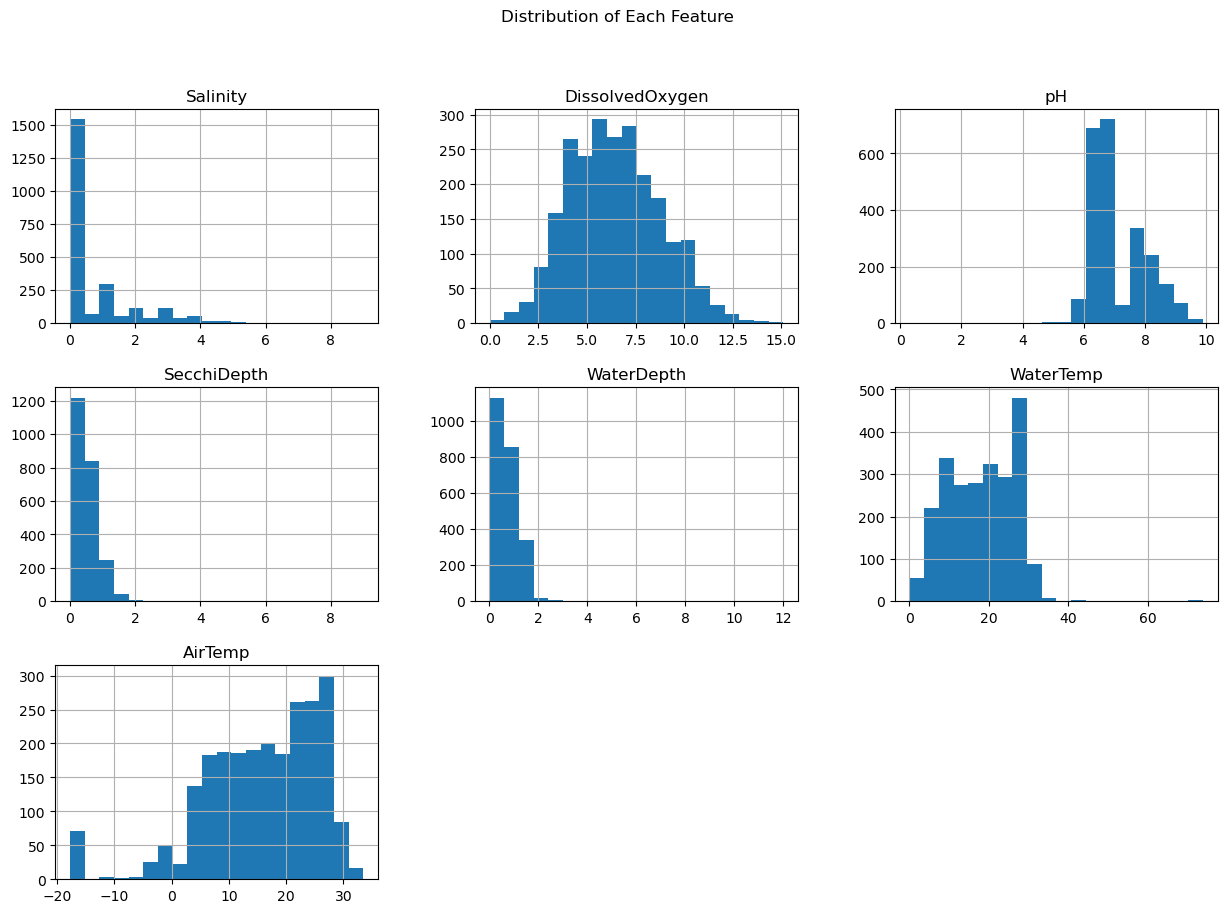

In [15]:
# Histogram for each feature to visualize distribution
df[['Salinity', 'DissolvedOxygen', 'pH', 'SecchiDepth', 'WaterDepth', 'WaterTemp', 'AirTemp']].hist(bins=20, figsize=(15, 10))
plt.suptitle("Distribution of Each Feature")
plt.show()


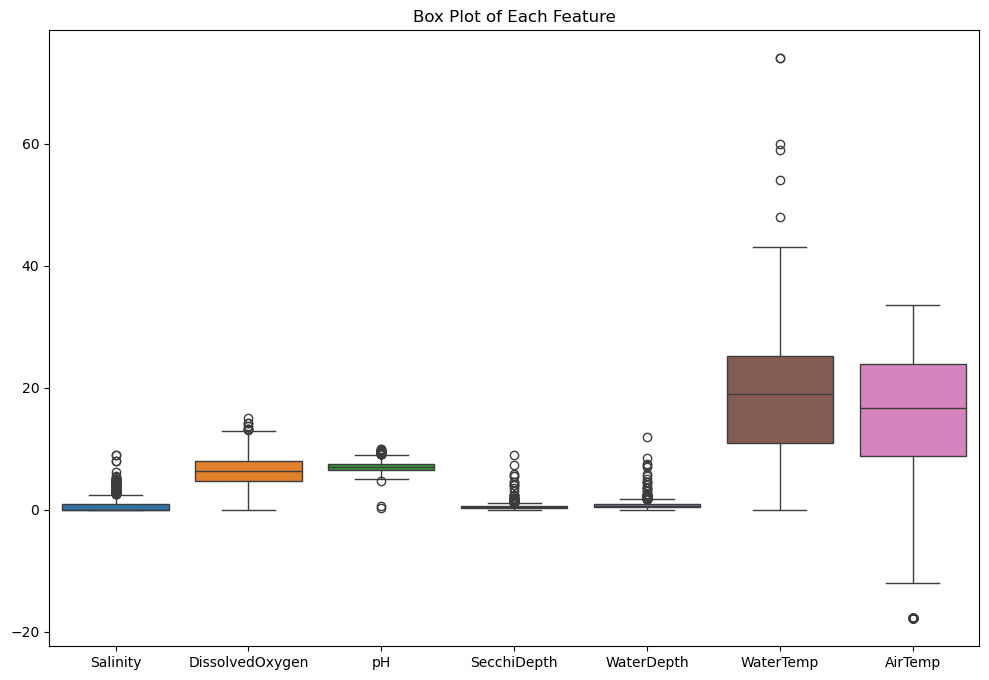

In [16]:
# Box plots for detecting outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[['Salinity', 'DissolvedOxygen', 'pH', 'SecchiDepth', 'WaterDepth', 'WaterTemp', 'AirTemp']])
plt.title("Box Plot of Each Feature")
plt.show()


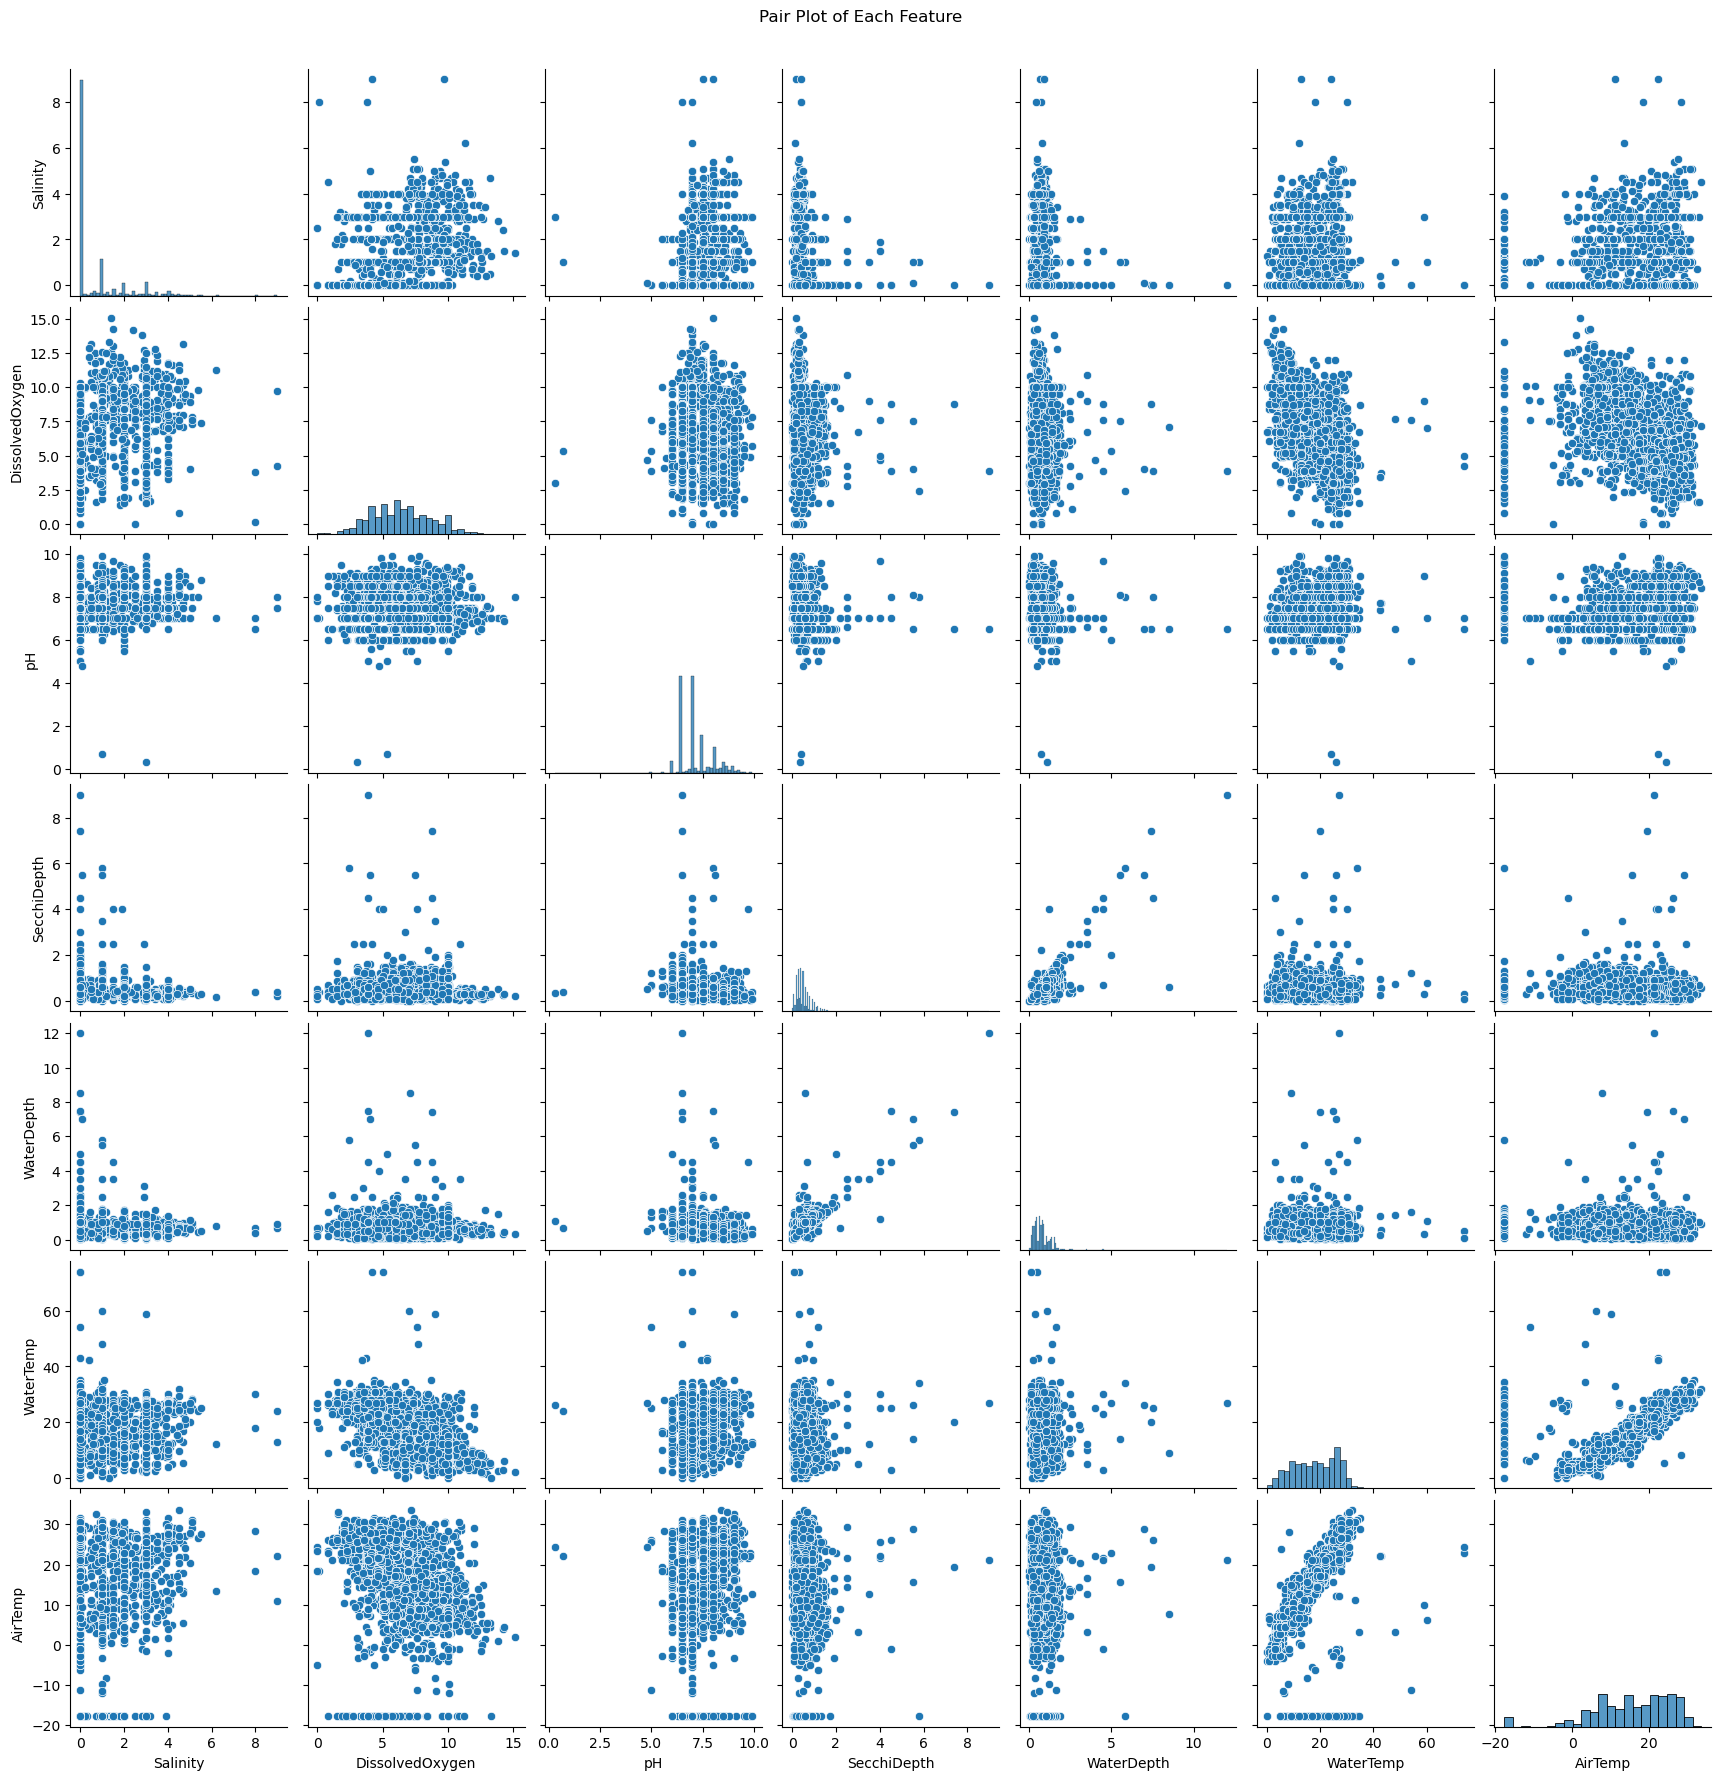

In [17]:
# Pair plot to see relationships between features
sns.pairplot(df[['Salinity', 'DissolvedOxygen', 'pH', 'SecchiDepth', 'WaterDepth', 'WaterTemp', 'AirTemp']])
plt.suptitle("Pair Plot of Each Feature", y=1.02)
plt.show()

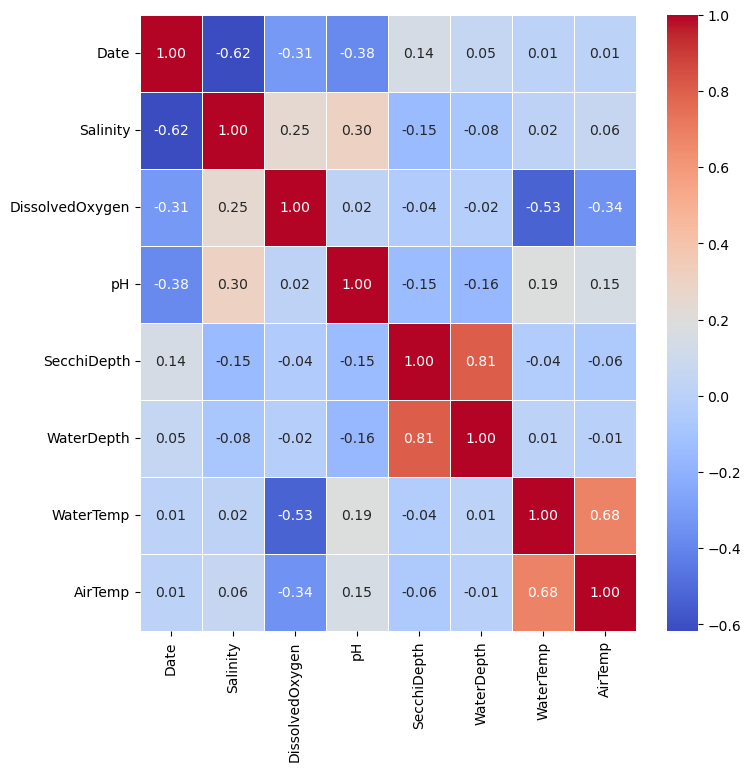

In [18]:
#Display Correlation Plot
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True,linewidths=0.7,fmt=".2f",
            cmap="coolwarm")
plt.show()

In [19]:
#Drop Date and SecchiDepth as we have Waterdepth
df.drop(["SecchiDepth","Date"],axis=1,inplace=True)
df.columns

Index(['Salinity', 'DissolvedOxygen', 'pH', 'WaterDepth', 'WaterTemp',
       'AirTemp'],
      dtype='object')

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
#Standardize the features in the dataset
features=["Salinity","DissolvedOxygen","WaterTemp"]
scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])

In [22]:
#Perform PCA 
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
X_reduced=pca.fit_transform(df[features])
pca.explained_variance_ratio_

array([0.52674447, 0.33800407])

In [23]:
sum(pca.explained_variance_ratio_)

0.864748540589794

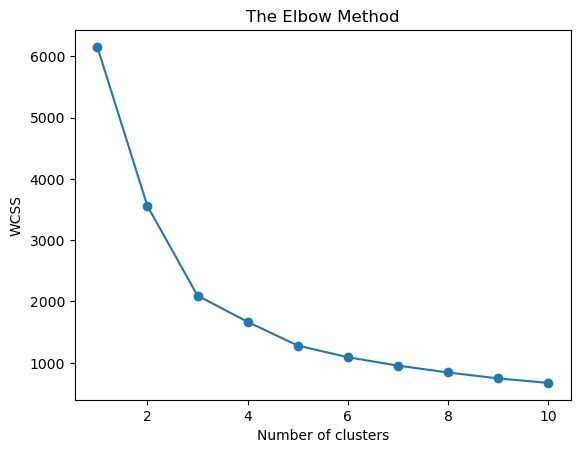

In [24]:
#Plot the elbow method to find optimal K
from sklearn.cluster import KMeans
wcss=[]
k_values=range(1,11)
for k in k_values:
    kmeans=KMeans(n_clusters=k,init='k-means++',random_state=42)
    kmeans.fit(X_reduced)
    wcss.append(kmeans.inertia_)
plt.plot(k_values, wcss, marker="o")
plt.title('The Elbow Method')
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [25]:
#Perform K-means clustering
kmeans=KMeans(n_clusters=3, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(X_reduced)

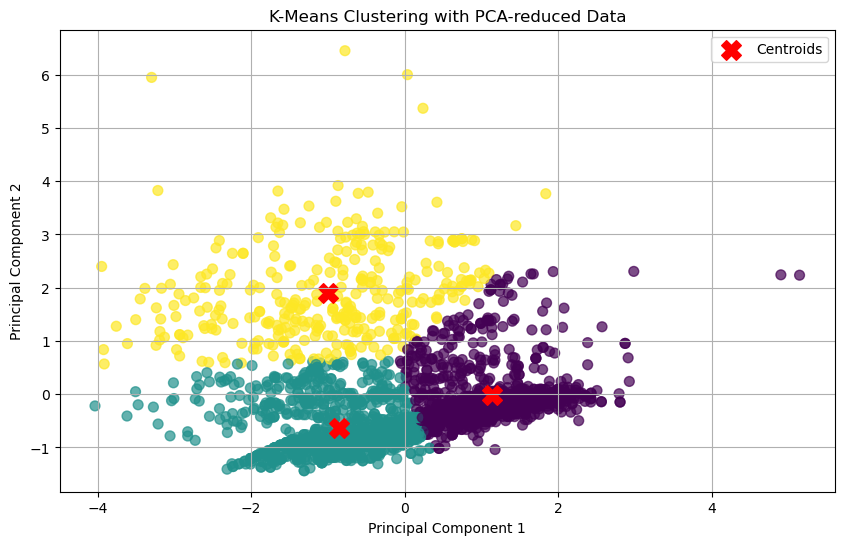

In [26]:
# Step 6: Plot the PCA-reduced clusters
plt.figure(figsize=(10, 6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=clusters, cmap='viridis', s=50, alpha=0.7)
plt.scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
    color='red', marker='X', s=200, label='Centroids'
)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering with PCA-reduced Data')
plt.legend()
plt.grid()
plt.show()

In [27]:
import scipy.cluster.hierarchy as sch

Text(0, 0.5, 'Euclidean Distance')

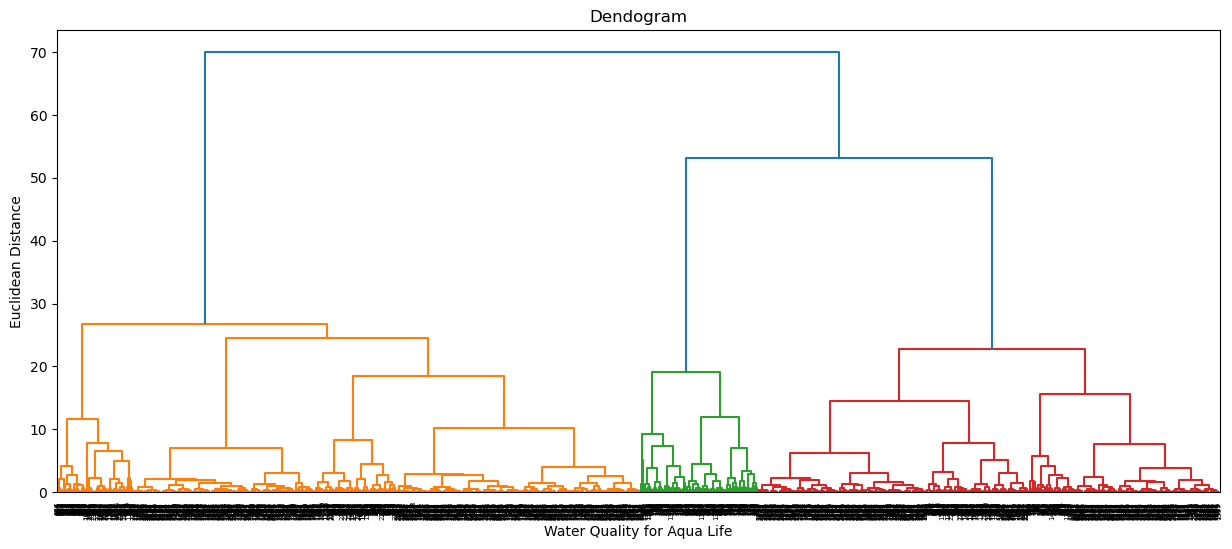

In [28]:
#Generate Dendrogram
plt.figure(figsize=(15,6))
dendogram=sch.dendrogram(sch.linkage(X_reduced,method='ward'))
plt.title('Dendogram')
plt.xlabel('Water Quality for Aqua Life')
plt.ylabel('Euclidean Distance')

In [29]:
#Perform Agglomerative Clustering
from sklearn.cluster import AgglomerativeClustering
ac=AgglomerativeClustering(n_clusters=3,metric='euclidean',linkage='ward')
y_ac=ac.fit_predict(X_reduced)

In [31]:
#Silhoutte Score of Agglomerative Clustering
from sklearn.metrics import silhouette_score
sil_score = silhouette_score(X_reduced, y_ac)
print(f"Silhouette Score for Agglomerative Clustering: {sil_score:.2f}")

Silhouette Score for Agglomerative Clustering: 0.45


In [33]:
# Step 4: Calculate silhouette score for K-means
sil_score = silhouette_score(X_reduced, clusters)
print(f'Silhouette Score for K-Means Clustering: {sil_score:.2f}')

Silhouette Score for K-Means Clustering: 0.48
